In [15]:
import numpy as np
from PIL import Image, ImageOps, ImageDraw, ImageFilter
import cv2
from urllib.request import urlopen
import matplotlib.pyplot as plt 

#### Read Image from URL

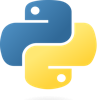

In [16]:
image = Image.open(urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/800px-Python-logo-notext.svg.png"))
image = image.resize([100, 100])
image

#### Gamma correction

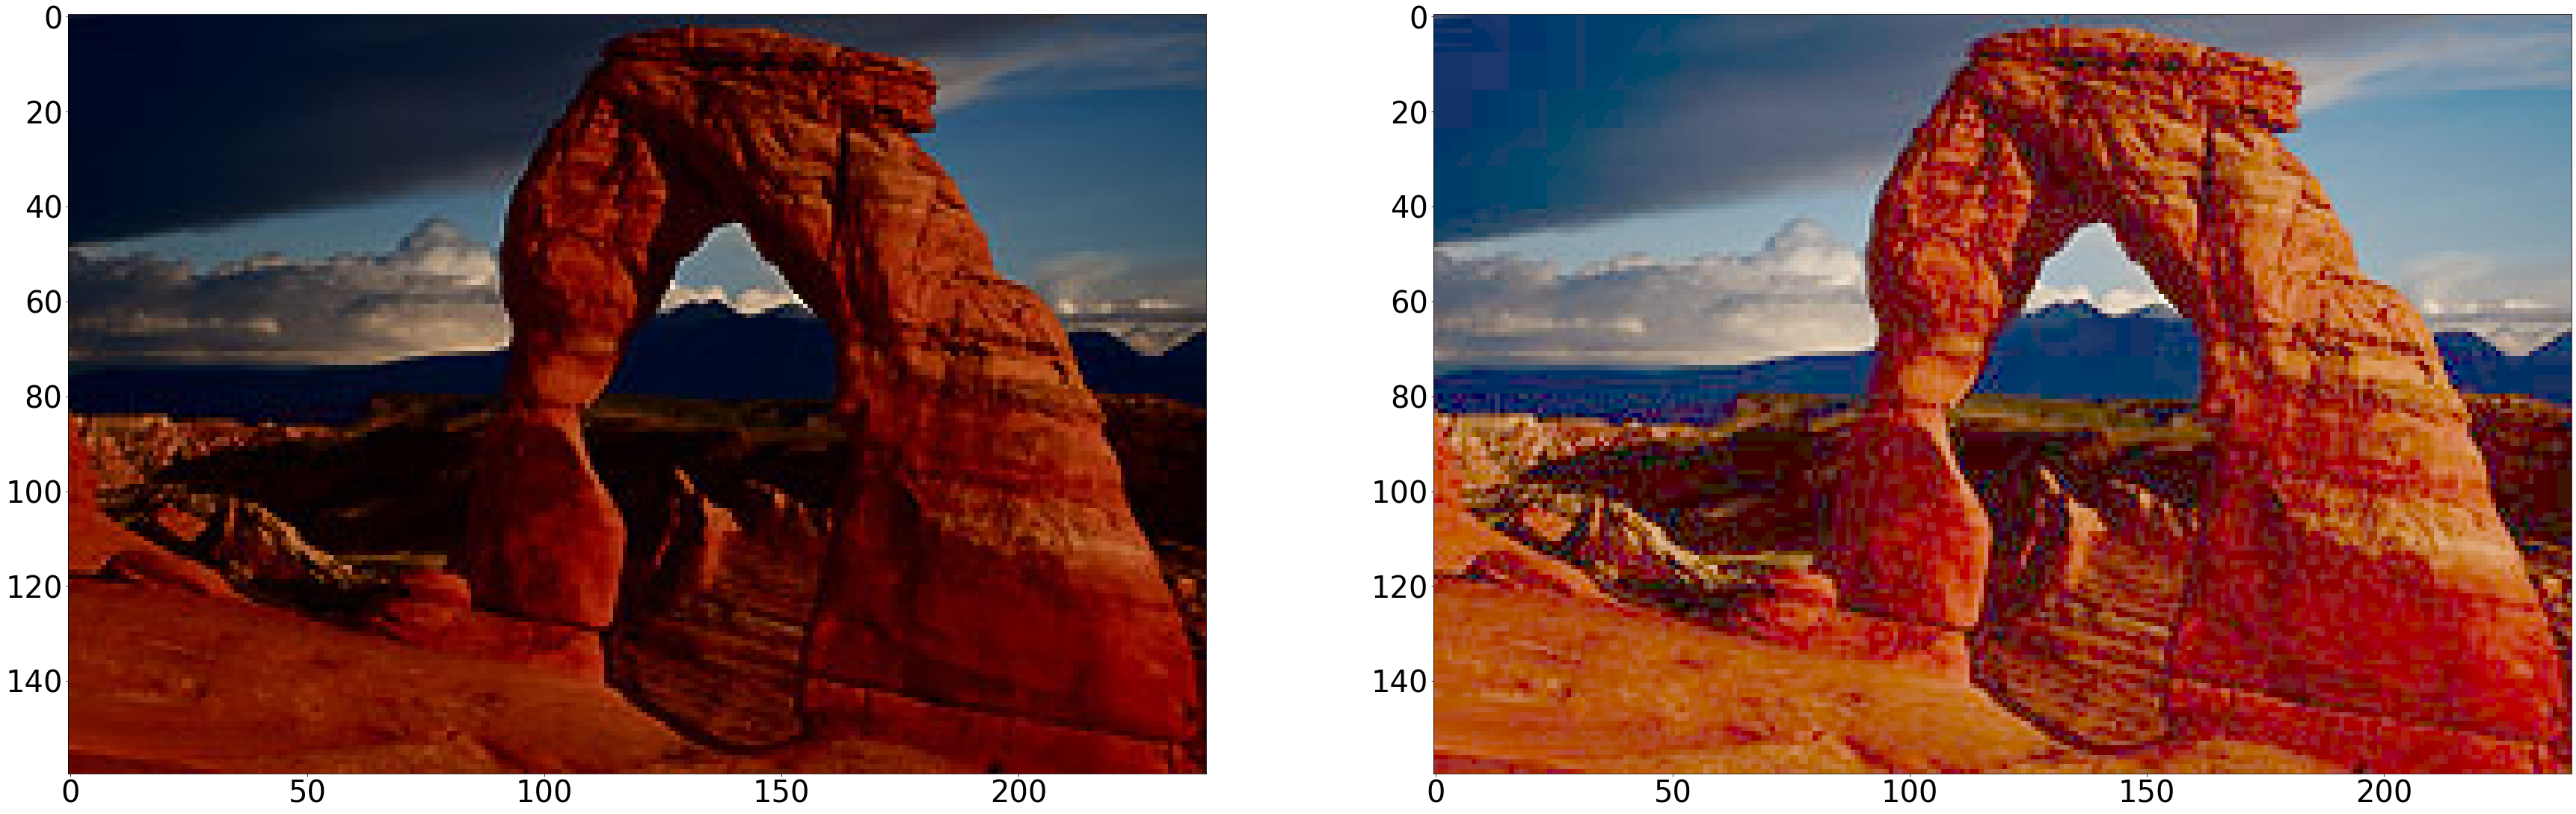

In [17]:
image = Image.open(urlopen("https://cdn.cambridgeincolour.com/images/tutorials/gamma_example-g10b.jpg"))
image = np.array(image)
gamma = 0.3
gamma = 1/2.2
gamma_corrected = np.array(255*(image / 255) ** gamma, dtype = 'uint8')
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.rcParams['figure.figsize'] = [200, 120]
plt.imshow(gamma_corrected)

#### Composting and Matting

##### Using PIL

composting and matting can be done using OpenCV using the following mathod. 
cv2.addWeighted(bg, alpha, fg, 1- alpha, 0.0). 

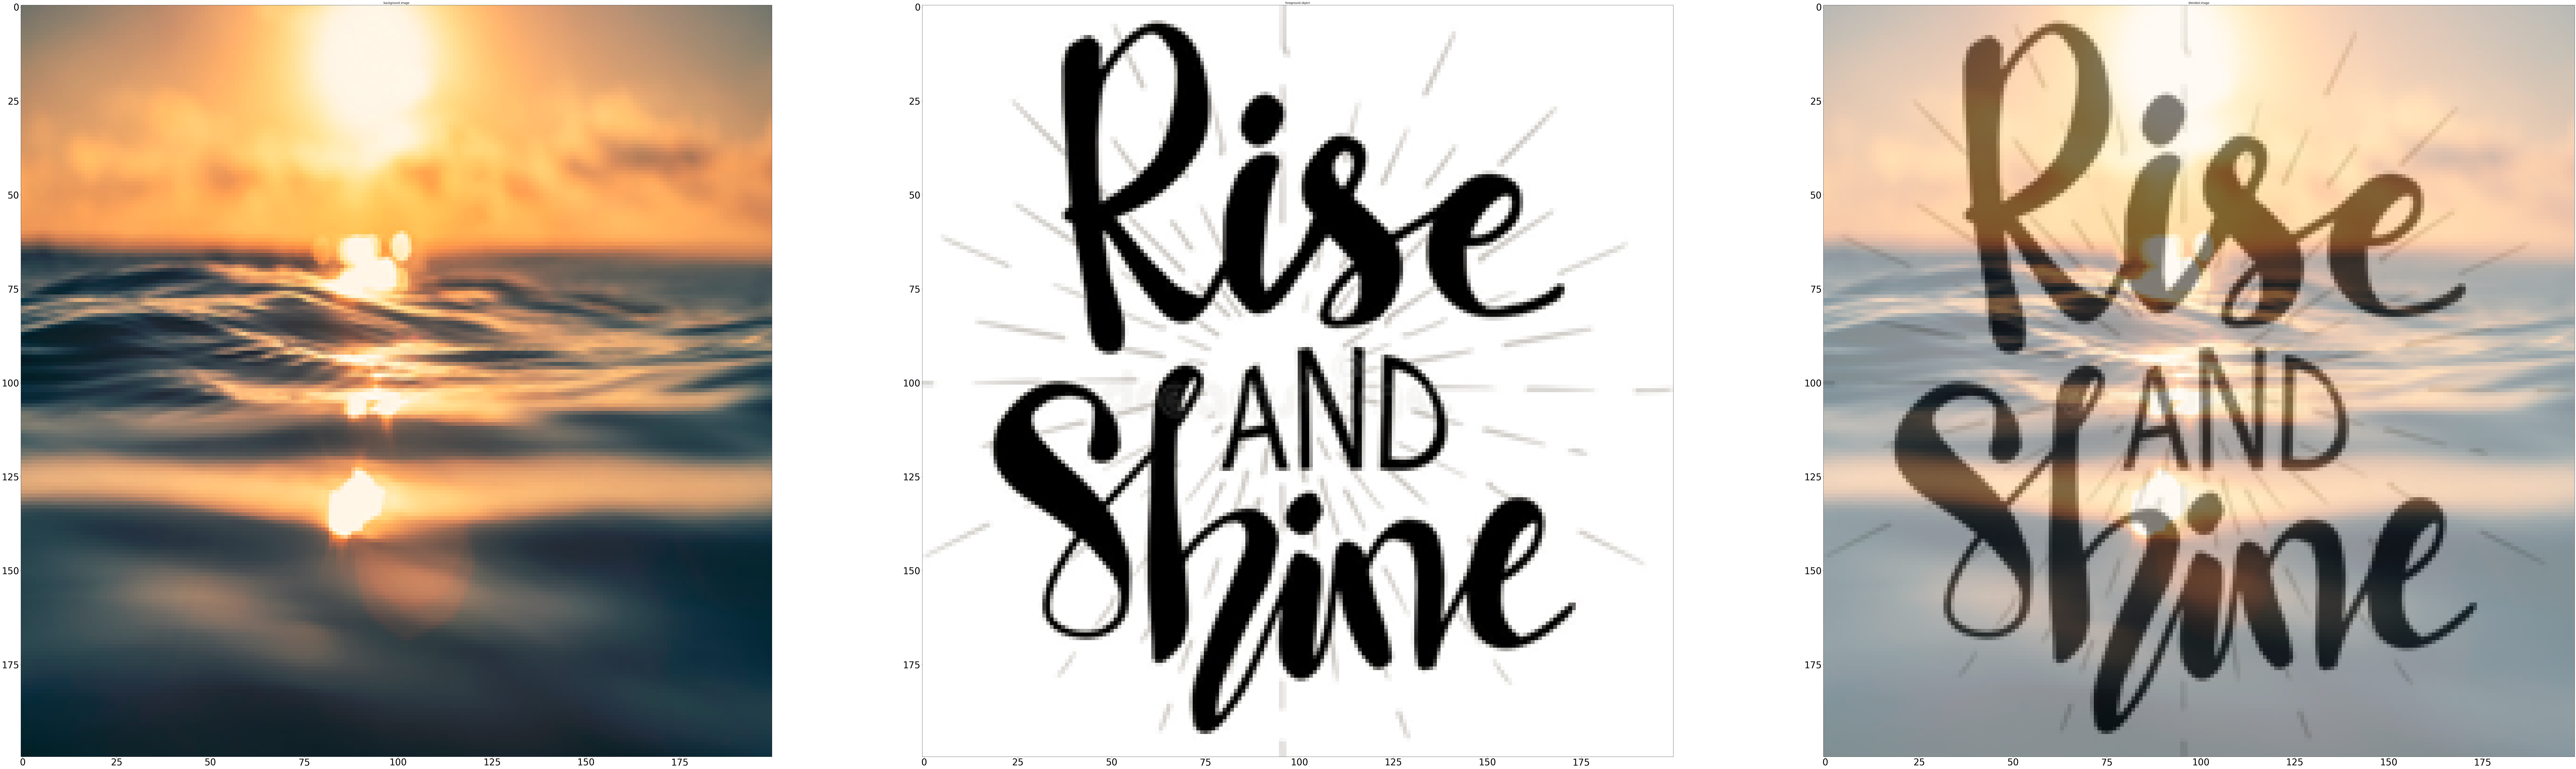

In [18]:
bg_img = Image.open("bg_image.png").resize([200, 200])
fg_img = Image.open("fg_image.png").resize([200, 200])

fg_img.resize((100, 100))
blended_img = Image.blend(bg_img, fg_img, 0.5)
plt.subplot(1,3,1)
plt.title("background image")
plt.imshow(np.array(bg_img))
plt.subplot(1,3,2)
plt.title("foreground object")
plt.imshow(np.array(fg_img))
plt.subplot(1,3,3)
plt.title("blended image")
plt.rcParams['figure.figsize'] = [120, 80]
plt.imshow(np.array(blended_img))



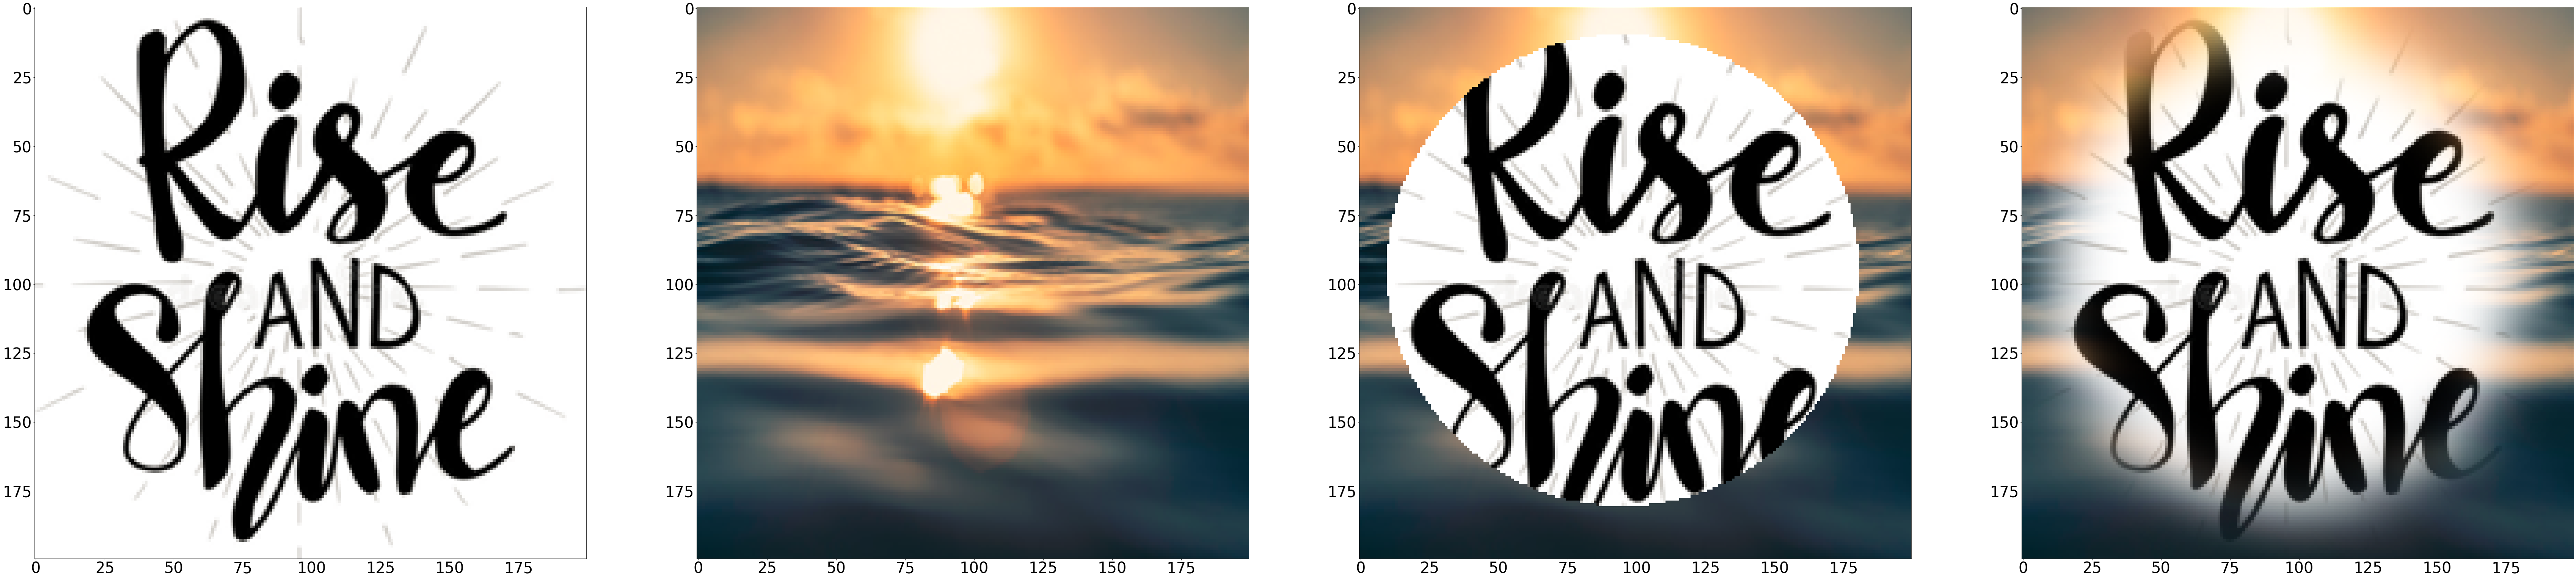

In [19]:
fg_img.resize(bg_img.size)
mask = Image.new("L", fg_img.size, 0)
draw = ImageDraw.Draw(mask)
draw.ellipse((10, 10, 180, 180), fill=255)
im = Image.composite(fg_img, bg_img, mask)
plt.subplot(1,4,1)
plt.imshow(np.array(fg_img))
plt.subplot(1,4,2)
plt.imshow(np.array(bg_img))
plt.subplot(1,4,3)
plt.imshow(np.array(im))
mask_blur = mask.filter(ImageFilter.GaussianBlur(10))
im = Image.composite(fg_img, bg_img, mask_blur)
plt.subplot(1,4,4)
plt.imshow(np.array(im))
plt.show()

##### Histogram

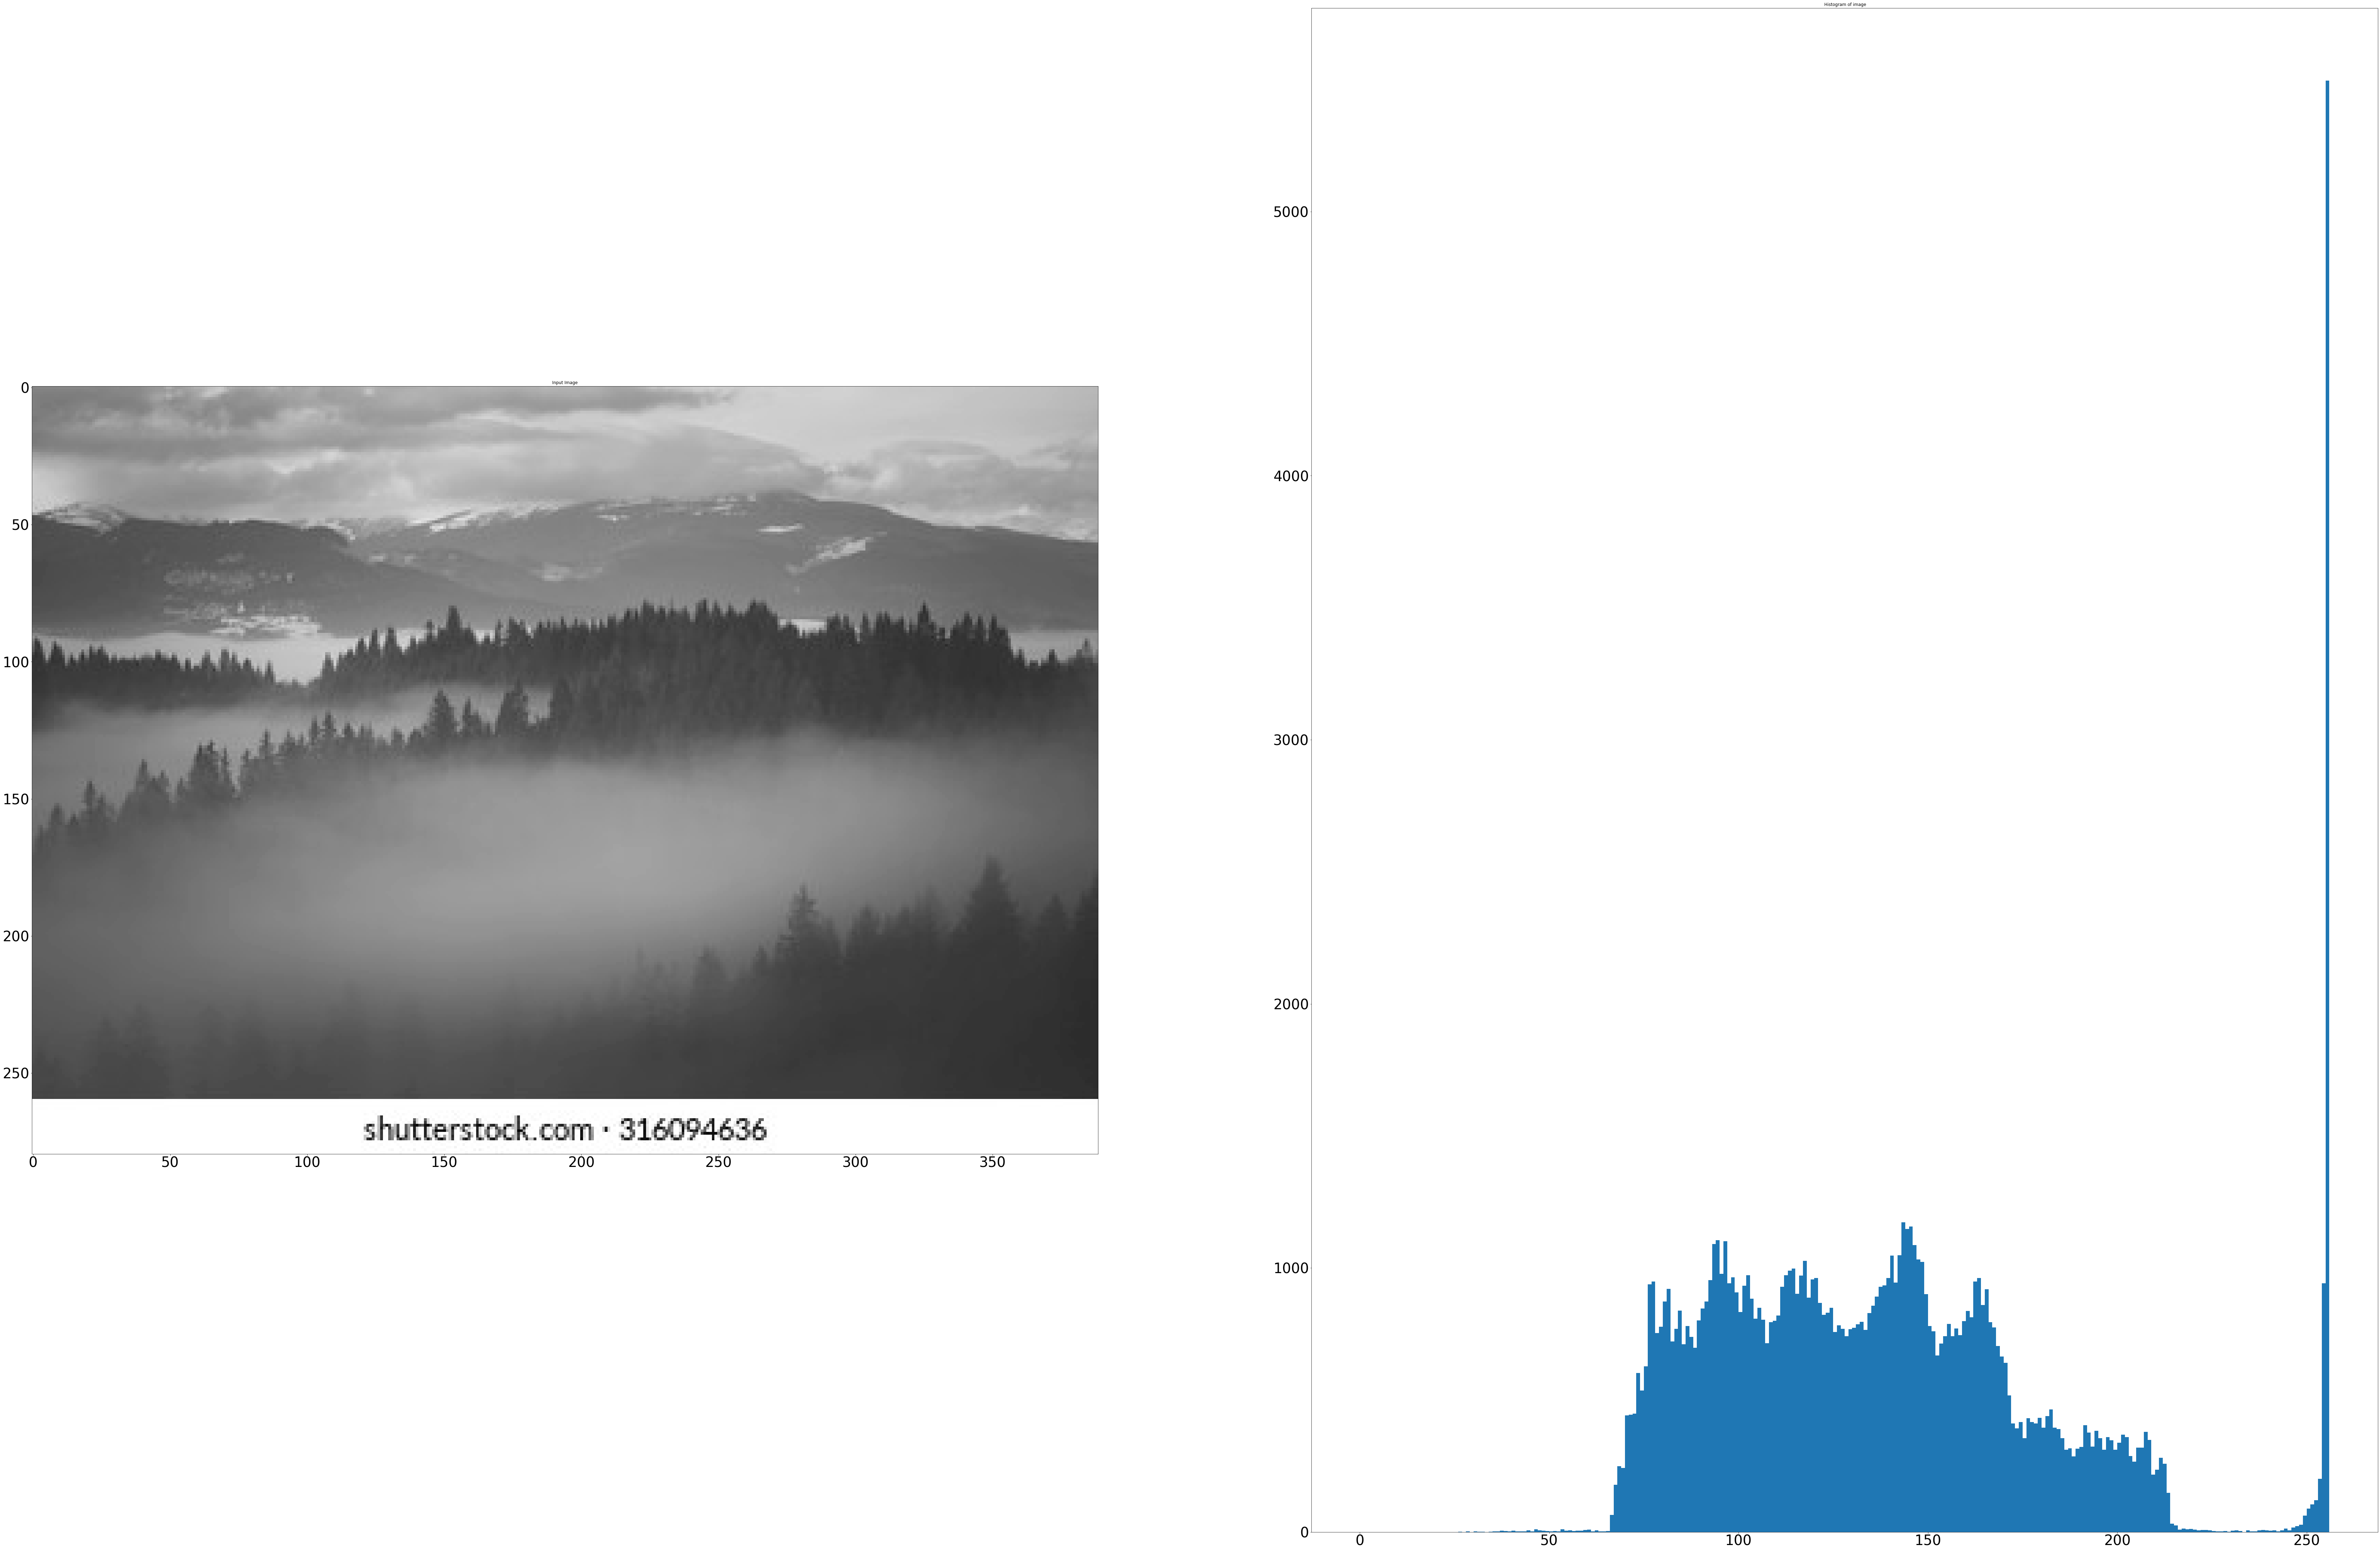

In [20]:
img = Image.open(urlopen("https://www.shutterstock.com/image-photo/winter-landscape-morning-fog-on-260nw-316094636.jpg"))
img = ImageOps.grayscale(img)
img = np.array(img)
# img = cv2.imread("low_contrast_image.JPG")
plt.subplot(1,2,1)
plt.title("Input Image")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title(" Histogram of image")
plt.hist(img.ravel(),256,[0,256])
plt.rcParams['xtick.labelsize']=40
plt.rcParams['ytick.labelsize']=40
plt.rcParams['figure.figsize'] = [60, 40]
plt.show()

##### Histogram Equalization

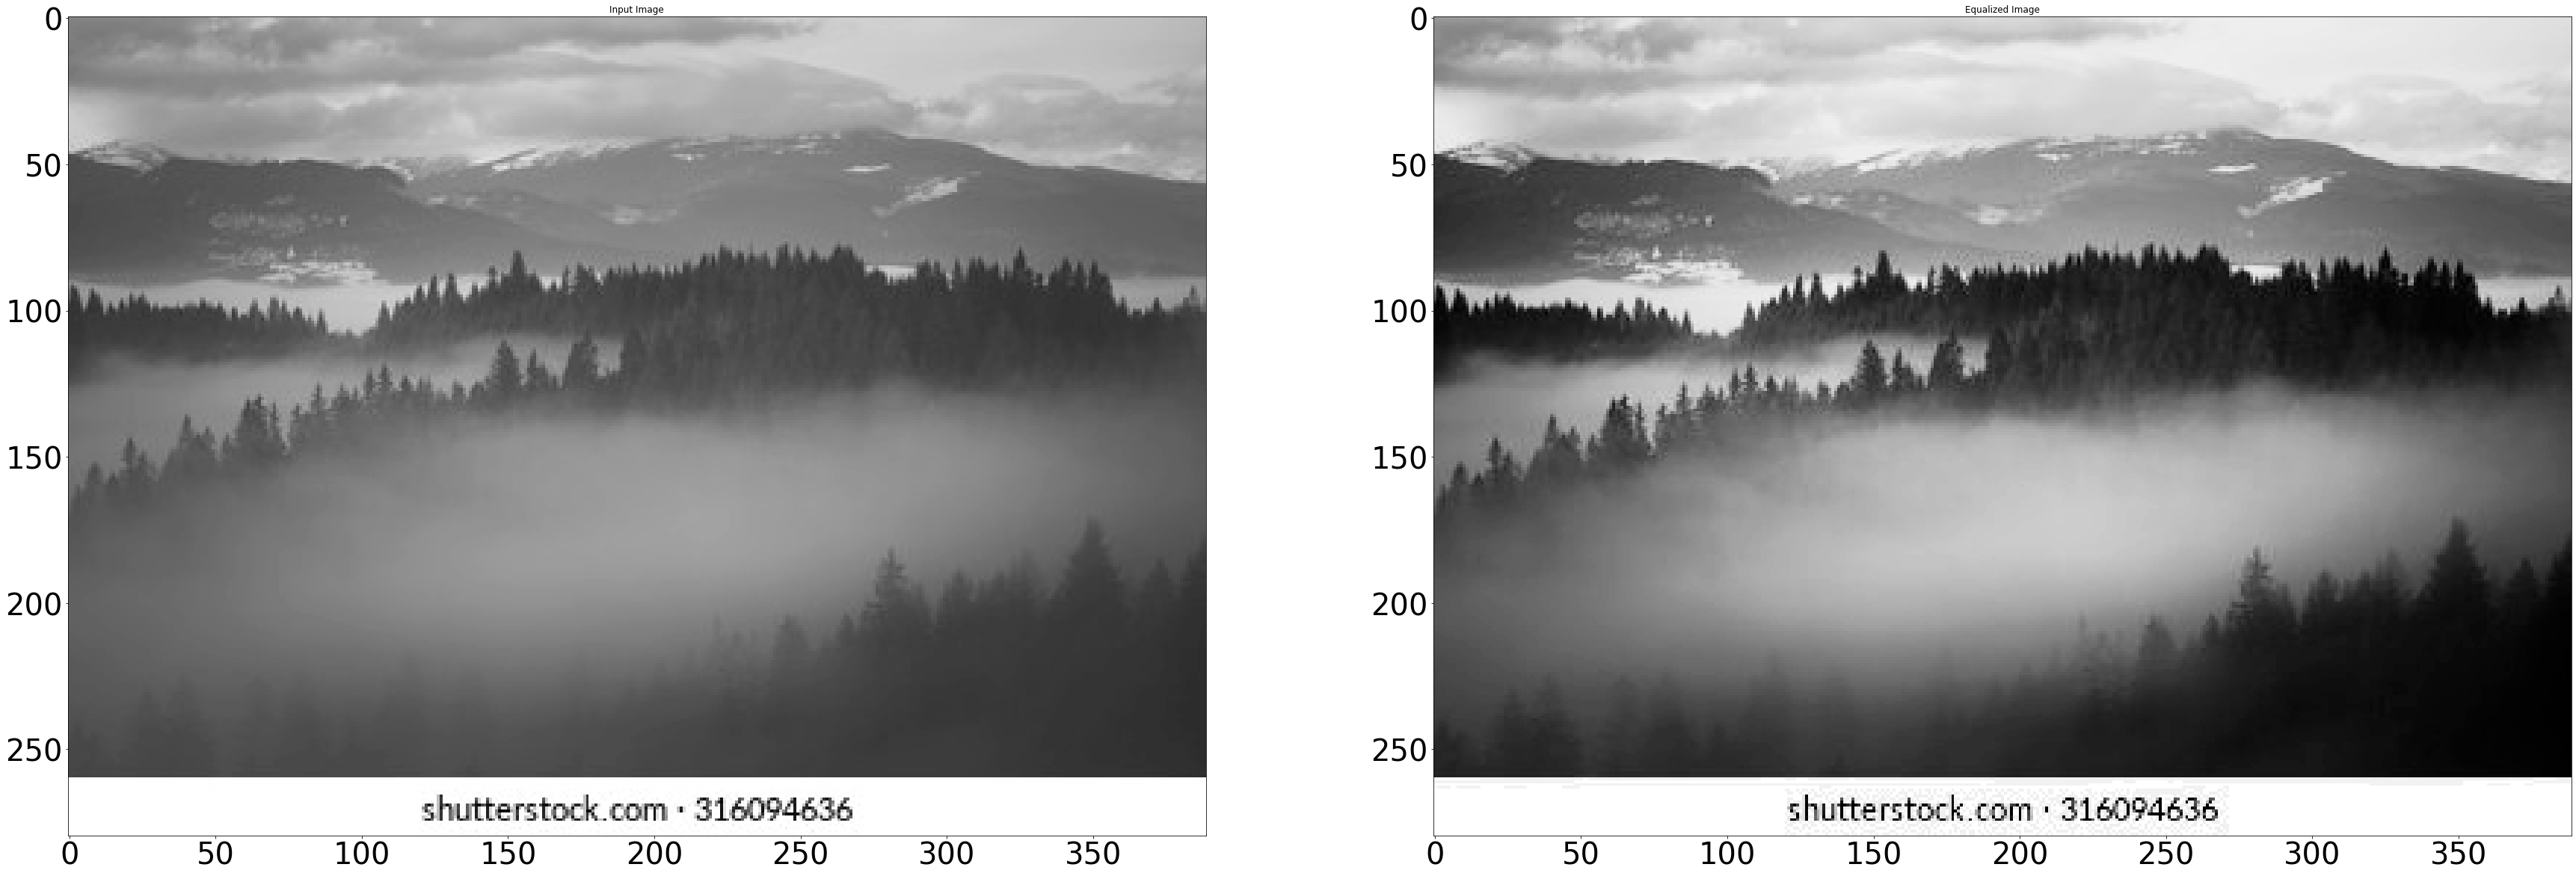

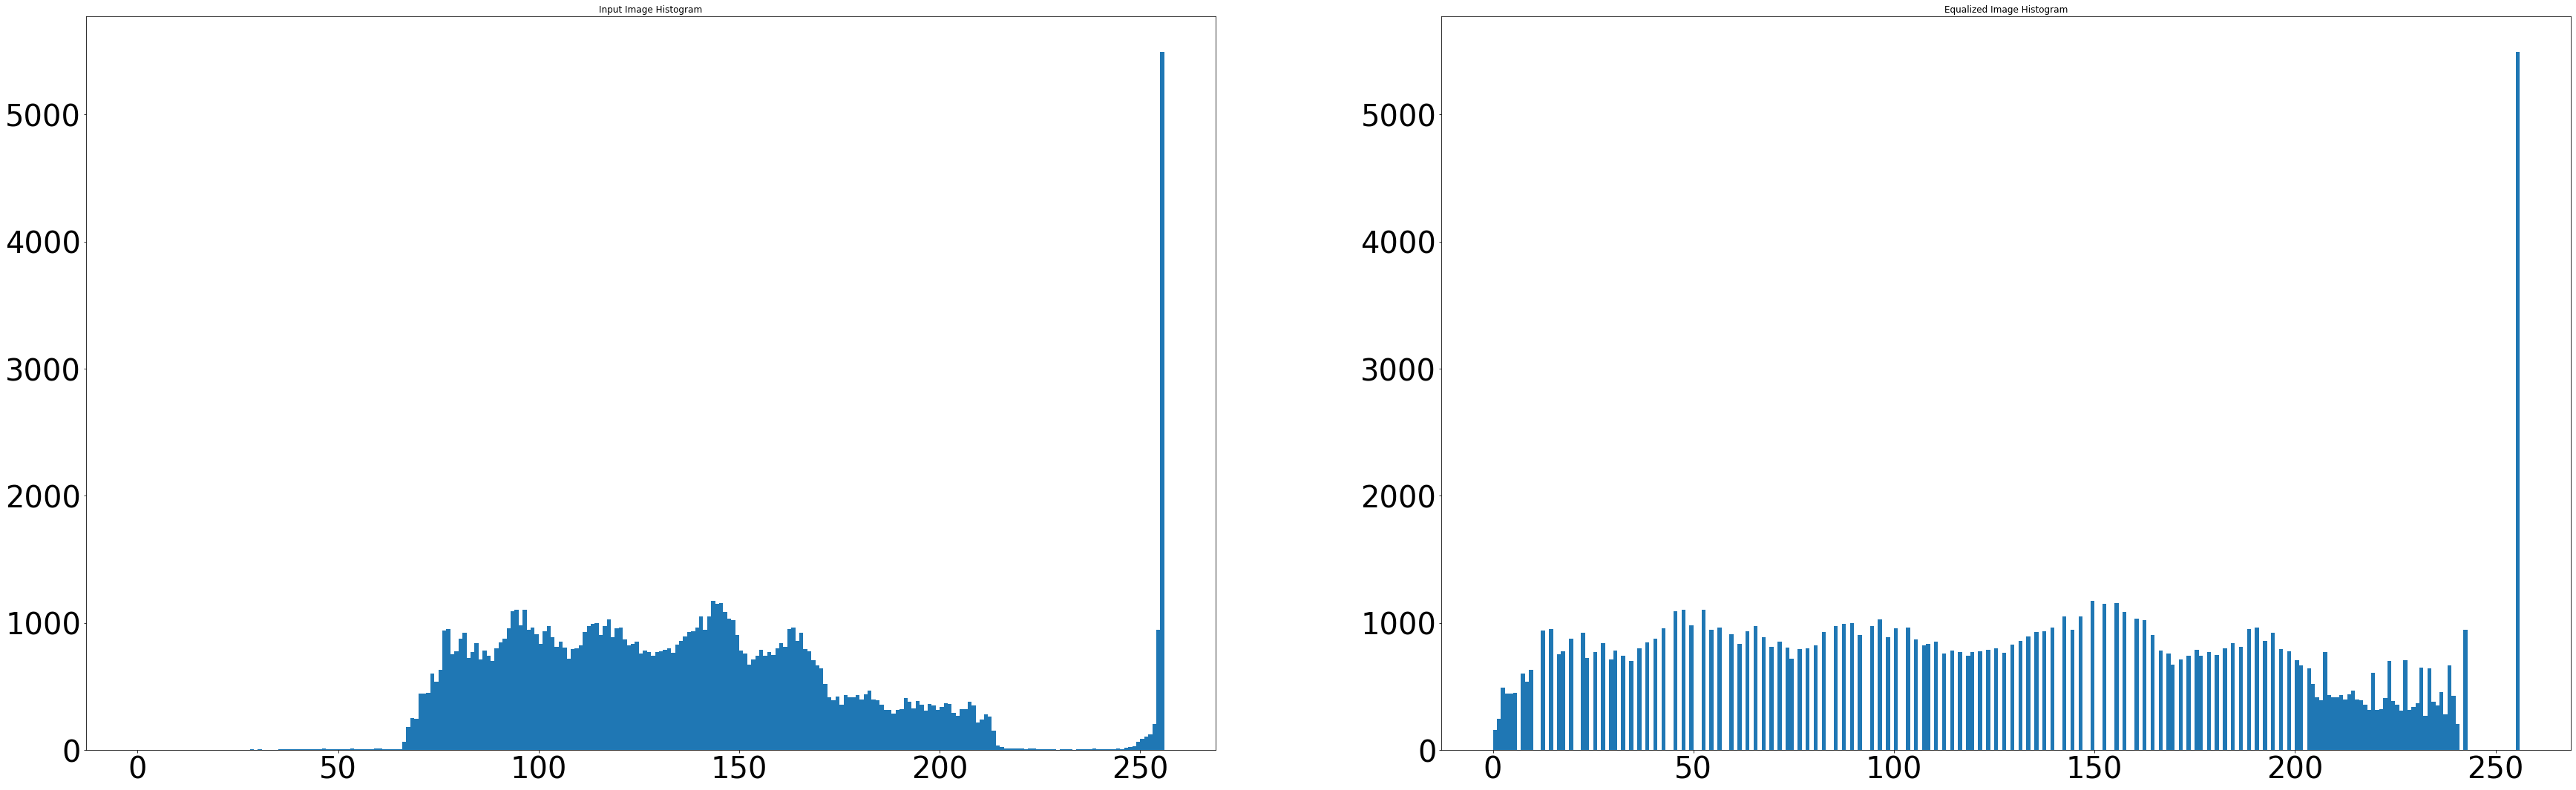

In [21]:
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
equalized_img = cv2.equalizeHist(img)
plt.subplot(1,2,1)
plt.title("Input Image")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("Equalized Image")
plt.imshow(equalized_img, cmap = 'gray')
plt.show()


plt.subplot(2,2,1)
plt.title("Input Image Histogram")
plt.hist(img.ravel(),256,[0,256])
plt.subplot(2,2,2)
plt.title("Equalized Image Histogram")
plt.hist(equalized_img.ravel(),256,[0,256])
plt.show()


Contrast - Locally adaptive Histogram Equalization

Text(0.5, 1.0, 'Adaptive Histogram Equalized')

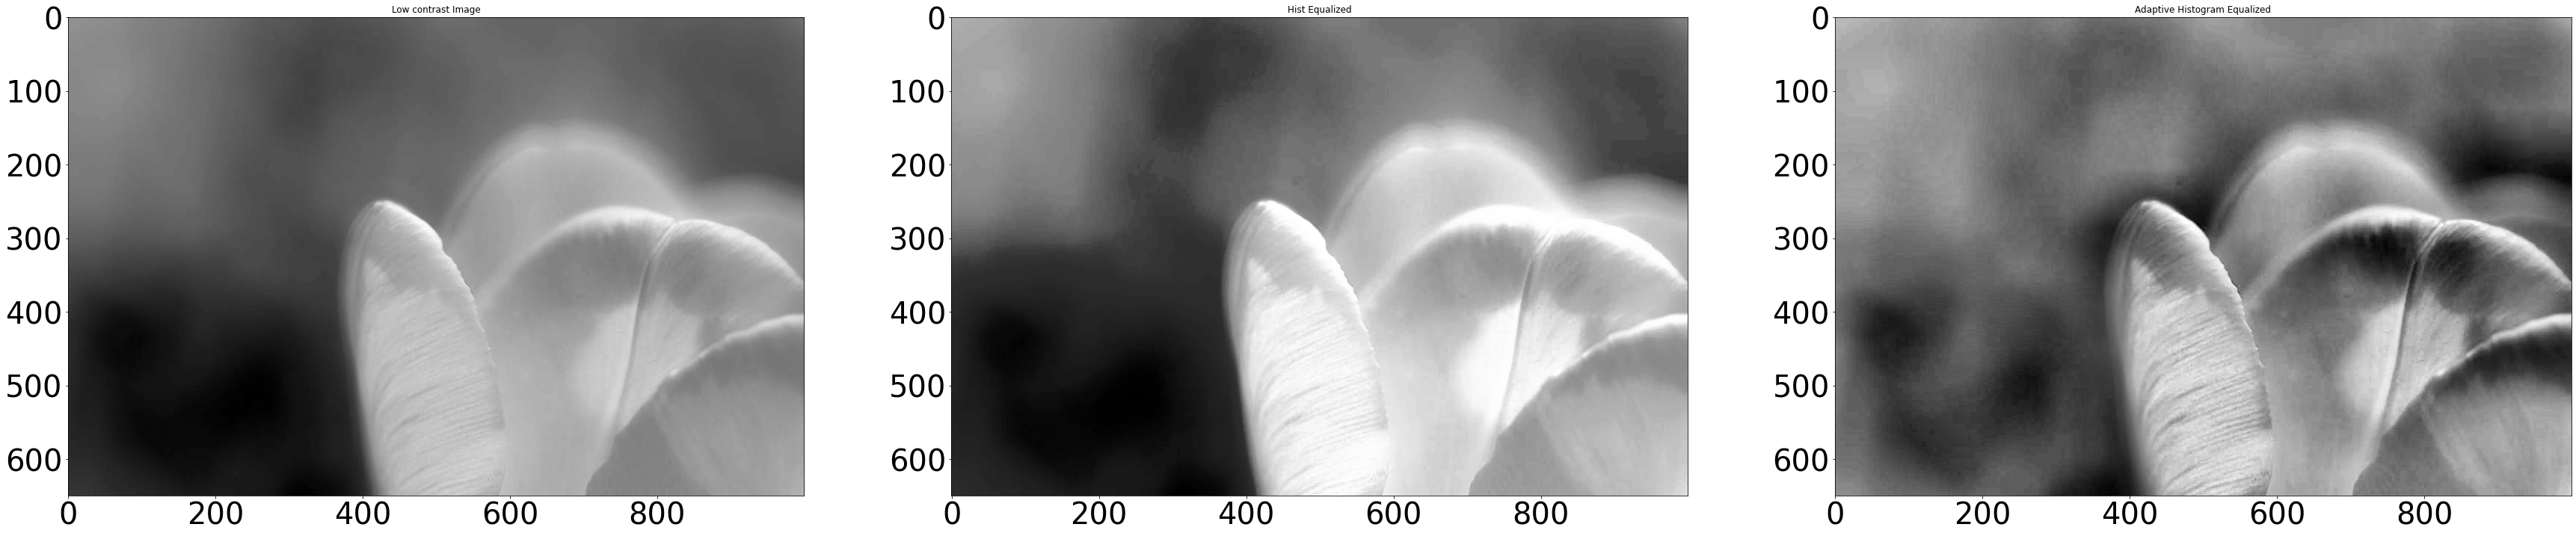

In [22]:
low_contrast_image = cv2.imread("low-contrast-image.jpg",0)
hist_equalized = cv2.equalizeHist(low_contrast_image)
clahe = cv2.createCLAHE(clipLimit=3)
adaptive_hist_eq = clahe.apply(low_contrast_image)
plt.subplot(1,3,1)
plt.imshow(low_contrast_image, cmap='gray')
plt.title("Low contrast Image")
plt.subplot(1,3,2)
plt.imshow(hist_equalized,cmap ='gray')
plt.title("Hist Equalized")
plt.subplot(1,3,3)
plt.imshow(adaptive_hist_eq, cmap='gray')
plt.title("Adaptive Histogram Equalized")